In [1]:
import tensorflow as tf
from tensorflow.keras import preprocessing
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb

In [2]:
max_features = 10000
maxlen = 500
epoch = 32

In [3]:
print('Loading Data...')
(x_train, y_train), (x_test, y_test)  = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')
print('Pad sequences (samples * times)')
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)
print('x train shape:', x_train.shape)
print('x test shape:', x_test.shape)

Loading Data...
25000 train sequences
25000 test sequences
Pad sequences (samples * times)
x train shape: (25000, 500)
x test shape: (25000, 500)


In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_features, 32),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(optimizer='rmsprop',
             loss = 'binary_crossentropy',
             metrics=['acc'])

In [9]:
history = model.fit(x_train, y_train,
                   epochs=10, 
                   batch_size = 128,
                   validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 38s 2ms/sample - loss: 0.5086 - acc: 0.7600 - val_loss: 0.4006 - val_acc: 0.8204
Epoch 2/10
20000/20000 [==============================] - 36s 2ms/sample - loss: 0.2953 - acc: 0.8826 - val_loss: 0.2851 - val_acc: 0.8846
Epoch 3/10
20000/20000 [==============================] - 35s 2ms/sample - loss: 0.2355 - acc: 0.9110 - val_loss: 0.4693 - val_acc: 0.8330
Epoch 4/10
20000/20000 [==============================] - 35s 2ms/sample - loss: 0.1982 - acc: 0.9263 - val_loss: 0.3554 - val_acc: 0.8620
Epoch 5/10
20000/20000 [==============================] - 34s 2ms/sample - loss: 0.1728 - acc: 0.9387 - val_loss: 0.3034 - val_acc: 0.8710
Epoch 6/10
20000/20000 [==============================] - 34s 2ms/sample - loss: 0.1600 - acc: 0.9441 - val_loss: 0.3016 - val_acc: 0.8884
Epoch 7/10
20000/20000 [==============================] - 35s 2ms/sample - loss: 0.1424 - acc: 0.9503 - val_loss: 0.3

In [10]:
def show_history(history, epochs):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    acc = history.history['acc']
    val_acc = history.history['val_acc']

    epochs_range = range(epochs)

    plt.figure(figsize=(12, 8))
    ax1 = plt.subplot(1, 2, 1)
    ax1.plot(epochs_range, loss,'bo', label='Training Loss')
    ax1.plot(epochs_range, val_loss,'r', label='Validation Loss')
    ax1.legend(loc='upper right')
    ax1.set_title('Training and Validation Loss')

    ax2 = plt.subplot(1, 2, 2)
    ax2.plot(epochs_range, acc, 'bo', label='Training acc')
    ax2.plot(epochs_range, val_acc, 'r', label='Validation acc')
    ax2.legend(loc='upper right')
    ax2.set_title('Training and Validation Acc')
    plt.show()

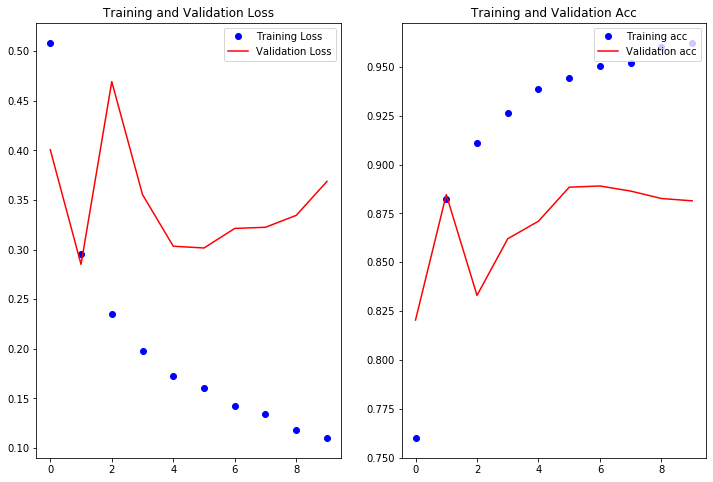

In [11]:
show_history(history, 10)